# Example
This is example of how to use this plotting and analyzing tools.

Import libraries

In [1]:
from alignment_parser import *
from alignment_manipulations import *
from csc_plotter import *
from dt_plotter import *
from gem_plotter import *

Welcome to JupyROOT 6.28/00


## db to xml plotter
After you run TBMA code you have several output files for each iteration. .db file with global geometry, report.py file with calculated local shifts and .root files with bunch of everything.
Start with .db. Convert .db to .xml using converter. .xml file contains local geometry with respect of ideal geometry. You are not only limited to plot geometry from TBMA, you can plot any geometry that stored in the same format. Below we will parse CSC chambers from 3 iterations of tbma and CSC chambers and layers from CSC layer alignment.

In [2]:
TBMA_1 = parse_xml_alignment(file_path="data/TBMA_1.xml",
                             detector_type="CSCChamber",
                             name="TBMA Iteration 1")
TBMA_2 = parse_xml_alignment(file_path="data/TBMA_2.xml",
                                detector_type="CSCChamber",
                                name="TBMA Iteration 2")
TBMA_3 = parse_xml_alignment(file_path="data/TBMA_3.xml",
                                detector_type="CSCChamber",
                                name="TBMA Iteration 3")
CSCLayerAlCh = parse_xml_alignment(file_path="data/CSCLaAl.xml",
                                    detector_type="CSCChamber",
                                    name="CSCLayer Alignment Chamber")
CSCLayerAlLa = parse_xml_alignment(file_path="data/CSCLaAl.xml",
                                   detector_type="CSCLayer",
                                   name = "CSCLayer Alignment Layer")

Now lets print df to see how it look like

In [3]:
display(TBMA_1)

,type,station,endcap,ring,chamber,x,y,z,phix,phiy,...,za,zb,zc,aa,ab,ac,bb,bc,cc,name
0,CSCChamber,1,1,1,1,0.054528,0.332245,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBMA Iteration 1
1,CSCChamber,1,1,1,3,0.013973,0.027023,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBMA Iteration 1
2,CSCChamber,1,1,1,5,-0.087752,0.097909,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBMA Iteration 1
3,CSCChamber,1,1,1,7,-0.164290,0.100086,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBMA Iteration 1
4,CSCChamber,1,1,1,9,-0.216351,0.176666,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBMA Iteration 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,CSCChamber,4,2,2,28,0.578133,0.054504,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBMA Iteration 1
608,CSCChamber,4,2,2,30,0.476600,-1.709855,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBMA Iteration 1
609,CSCChamber,4,2,2,32,0.290231,-0.155882,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBMA Iteration 1
610,CSCChamber,4,2,2,34,0.331699,0.729914,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBMA Iteration 1


Now plot CSC chamber positions for TBMA Iteration 1 

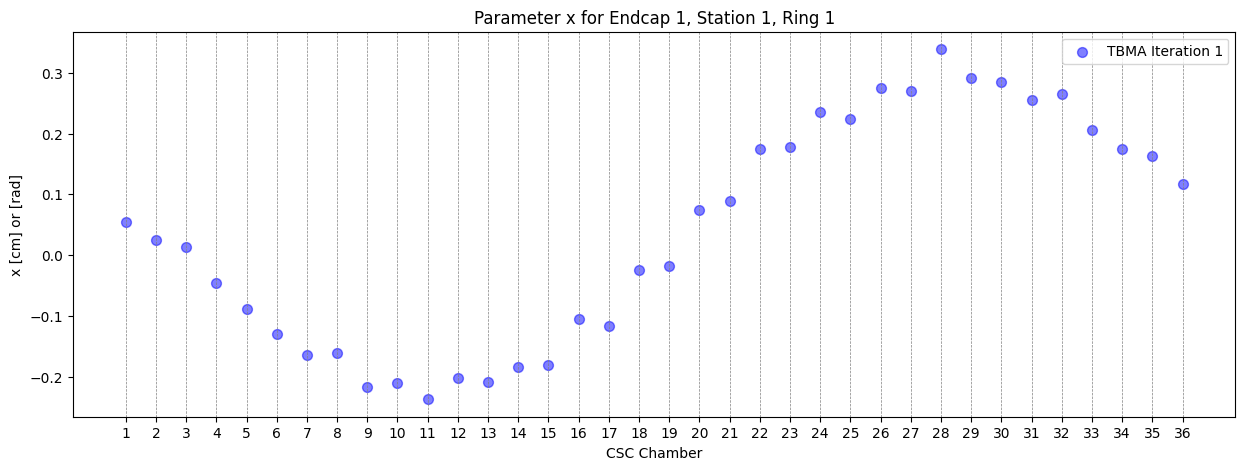

In [4]:
plot_CSC_chambers_alignment(TBMA_1, 
                            endcap = 1,
                            station = 1,
                            ring = 1,
                            par = "x",
                            saveplot= False)

You can plot several dataframes on the plot by passing list of dataframes into plotting function.

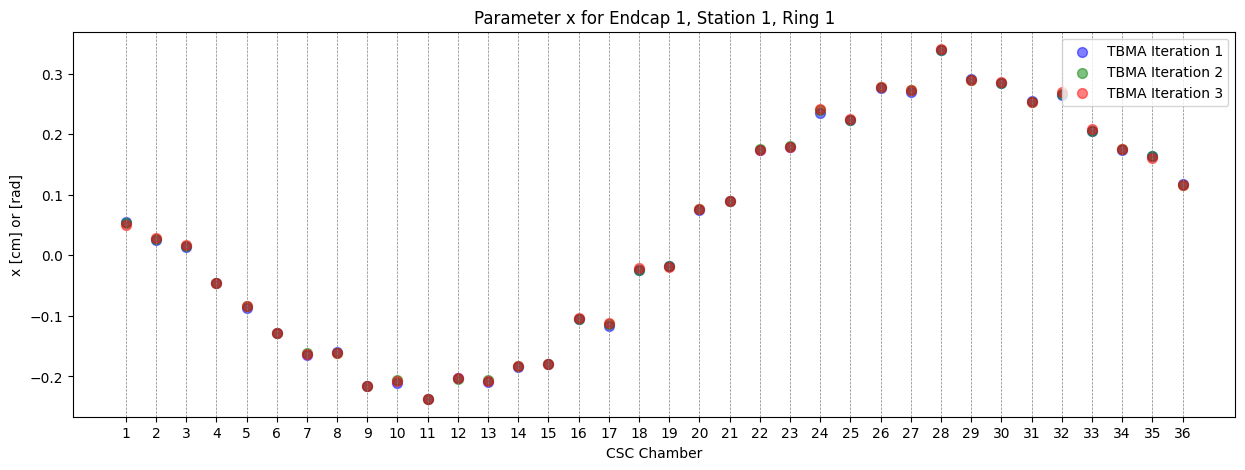

In [5]:
TBMA_list = [TBMA_1, TBMA_2, TBMA_3]
plot_CSC_chambers_alignment(TBMA_list,
                            endcap = 1,
                            station = 1,
                            ring = 1,
                            par = "x",
                            saveplot= False)

TBMA almost didn't shift chambers between iterations so this points a bit overlapping. But you can subtract them and plot the result of subtraction. Lets find the difference of x between 1st and 2nd iteration and plot it

In [6]:
TBMA_diff = subtract_alignment(TBMA_2, TBMA_1, parameter="x", name="TBMA 2-1")

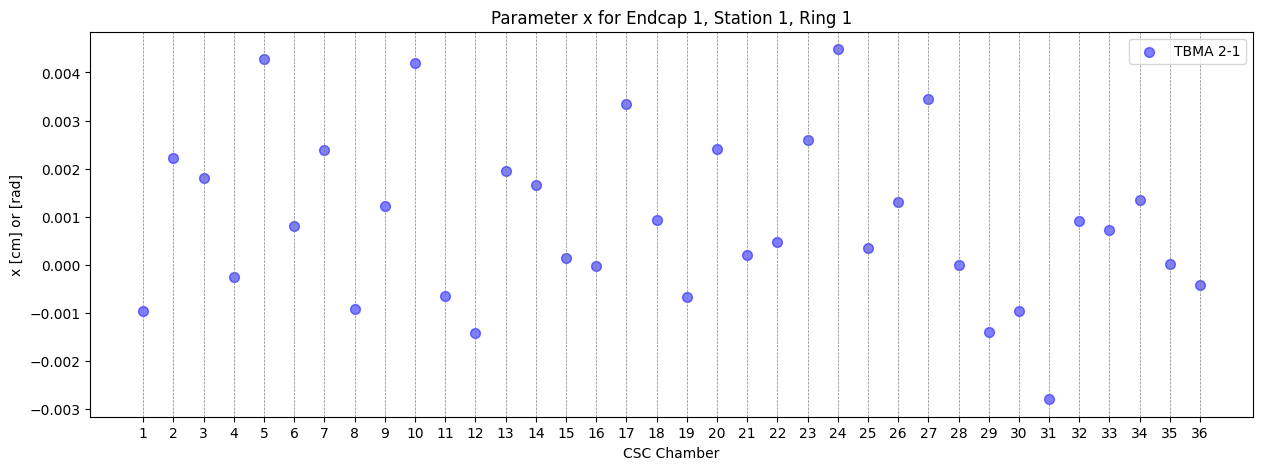

In [7]:
plot_CSC_chambers_alignment(TBMA_diff, 
                            endcap = 1,
                            station = 1,
                            ring = 1,
                            par = "x",
                            saveplot= False)

To plot layers from CSC layer alignment

/Users/mykytakizilov/projects/graduate_school/MuonAlignmentAnalyser/csc_plotter.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['layer'] = df_filtered['layer'].astype(int)


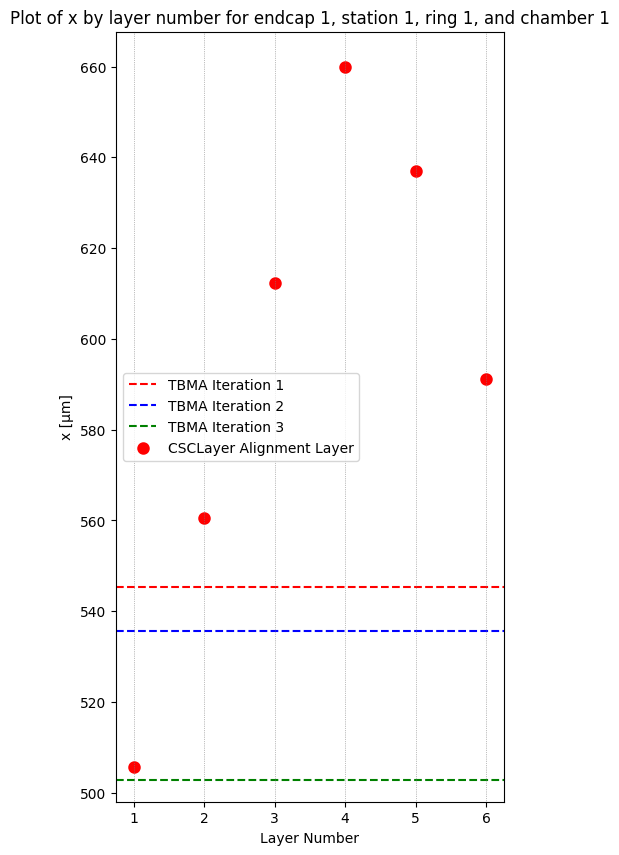

In [8]:
plot_CSC_layer_alignment(df_list = CSCLayerAlLa, 
                         endcap = 1,
                         station = 1,
                         ring = 1,
                         chamber = 1,
                         parameter = "x",
                         saveplot = False,
                         df_list_chamber = TBMA_list)

## CSC Alignment .csv file
To get CSC layer alignment df from .csv file:

In [9]:
CSC_csv = parse_csv_to_dataframe("data/CSCLaAl.csv", 
                                 name="CSCLayer Alignment CSV")

In [10]:
# You can manually filter dataframe like that to see values
CSC_csv[(CSC_csv['endcap'] == 1) & (CSC_csv['station'] == 1) & (CSC_csv['ring'] == 1) & (CSC_csv['chamber'] == 1)]

,endcap,station,ring,chamber,layer,x,y,z,phix,phiy,phiz,numEvents,type,name
216,1,1,1,1,1,0.030697,0,0,0,0,0,1347,CSCLayer,CSCLayer Alignment CSV
217,1,1,1,1,2,0.034075,0,0,0,0,0,1363,CSCLayer,CSCLayer Alignment CSV
218,1,1,1,1,3,0.040842,0,0,0,0,0,1370,CSCLayer,CSCLayer Alignment CSV
219,1,1,1,1,4,0.049238,0,0,0,0,0,1371,CSCLayer,CSCLayer Alignment CSV
220,1,1,1,1,5,0.046738,0,0,0,0,0,1380,CSCLayer,CSCLayer Alignment CSV
221,1,1,1,1,6,0.038881,0,0,0,0,0,1374,CSCLayer,CSCLayer Alignment CSV


/Users/mykytakizilov/projects/graduate_school/MuonAlignmentAnalyser/csc_plotter.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['layer'] = df_filtered['layer'].astype(int)
/Users/mykytakizilov/projects/graduate_school/MuonAlignmentAnalyser/csc_plotter.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['layer'] = df_filtered['layer'].astype(int)


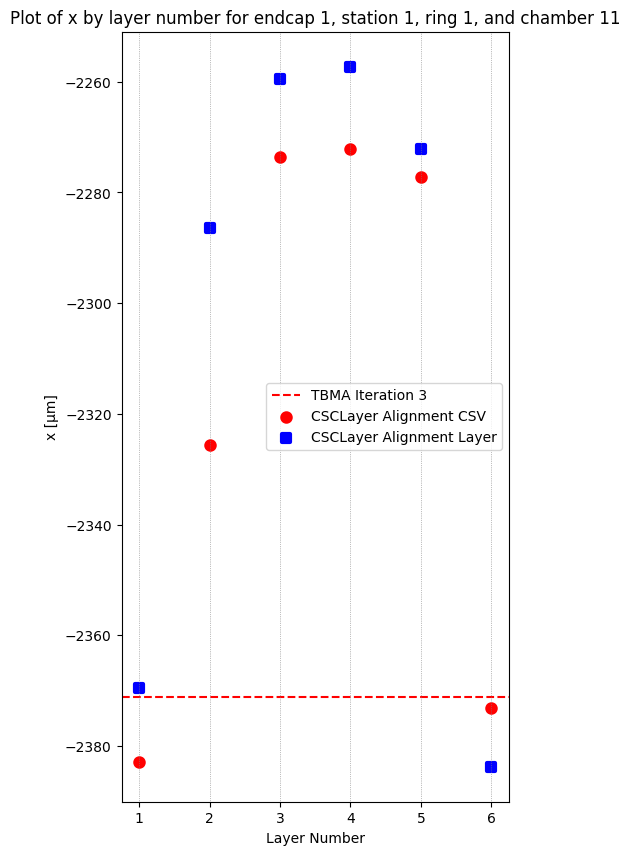

In [11]:
plot_CSC_layer_alignment(df_list = [CSC_csv, CSCLayerAlLa], 
                         endcap = 1,
                         station = 1,
                         ring = 1,
                         chamber = 11,
                         parameter = "x",
                         saveplot = False,
                         df_list_chamber = TBMA_3)

## Working with CSC Layer Alignment .root file

In [17]:
CSC_root = parse_CSC_layer_alignment_root_to_dataframe("data/2024B.root", "Some Name")

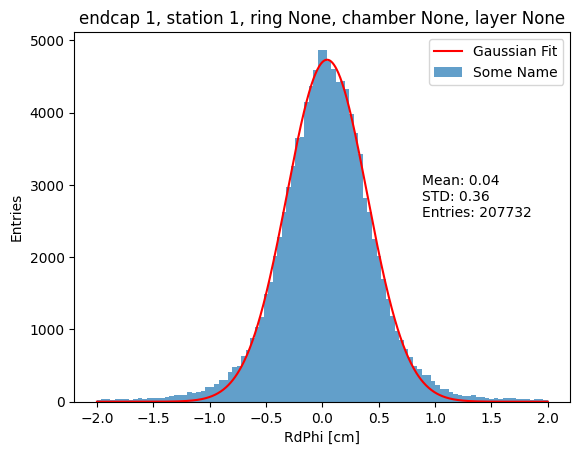

In [18]:
plot_RdPhi_fit(CSC_root, endcap = 1, station = 1, hist_range = (-2, 2), bins = 100)

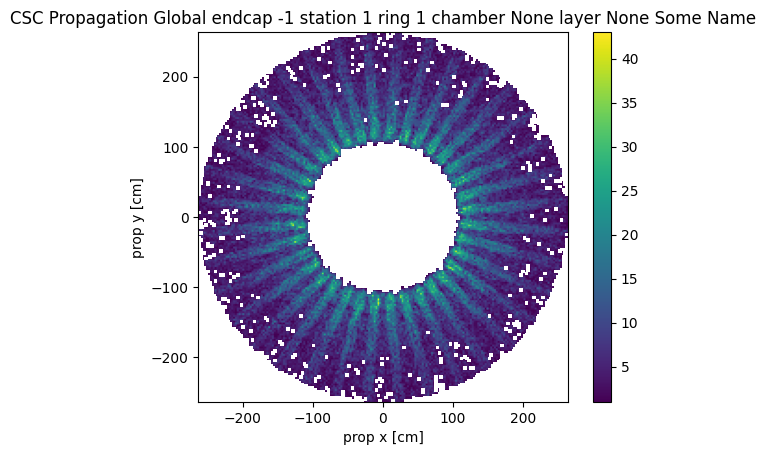

In [19]:
plot_entries_heatmap(CSC_root, endcap = -1, station = 1, ring = 1)

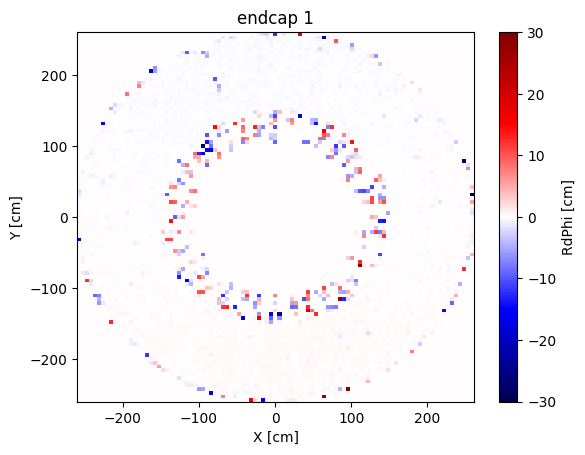

In [20]:
CSC_root_fidcut = CSC_root[CSC_root['has_fidcut']==True]
CSC_root_fidcut = CSC_root_fidcut[(CSC_root_fidcut['muon_pt'] > 30) & (CSC_root_fidcut['muon_pt'] < 120) & (abs(CSC_root_fidcut['RdPhi']) < 999)]
plot_RdPhi_heatmap(CSC_root_fidcut, endcap = 1, station = 1)

## Report.py from TBMA

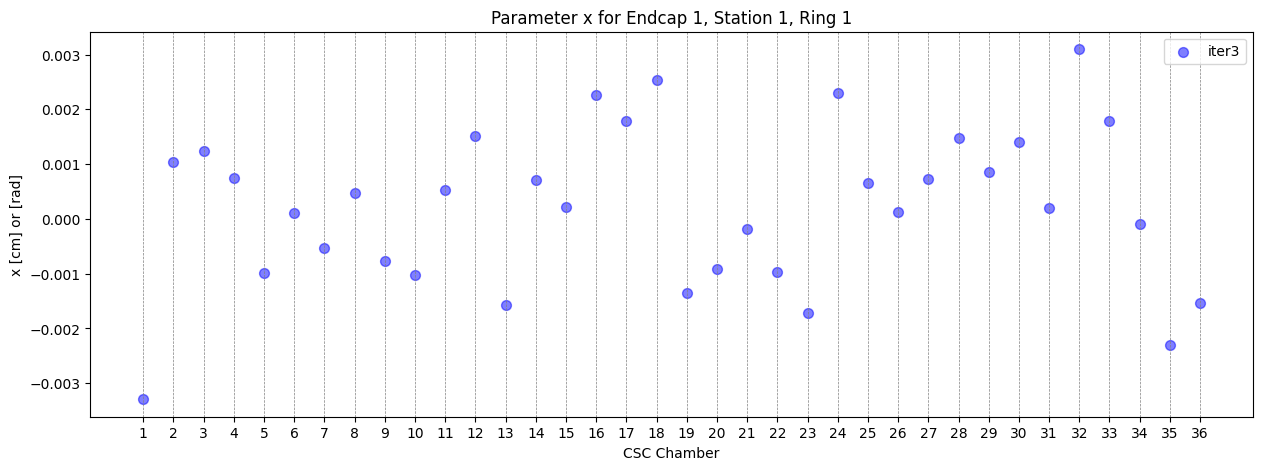

In [21]:
df_report = parse_csc_reports('data/iter3_report.py', 'iter3')
plot_CSC_chambers_alignment(df_report, endcap = 1, station = 1, ring = 1, par = 'x', saveplot = False)